In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [4]:
online=pd.read_csv('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/results/PreprocessedResults_101participants.csv')
online.rename(columns={'Musician_years of instruction ( >= 5 -> 2 )':'Musicians'},inplace=True)
online.head(3)

,Name,AudSD,AudSeq,AudBeat,VisSD,VisSeq,VisBeat,Musicians,Unnamed: 8,AudSDIntDiff (T),...,AudIrregIntDiff (T),AudIrregIntDiff (F),AudRegIntDiff (T),AudRegIntDiff (F),VisSDIntDiff (T),VisSDIntDiff (F),VisIrregIntDiff (T),VisIrregIntDiff (F),VisRegIntDiff (T),VisRegIntDiff (F)
0,10059,0.79,0.57,0.53,0.76,0.67,0.53,2,NaN,1.81,...,2.90,2.78,1.75,1.79,1.87,0.89,2.90,2.74,1.75,1.79
1,10579,0.90,0.97,1.00,0.76,0.87,0.90,1,NaN,1.73,...,2.87,2.10,1.77,0.00,1.84,0.99,2.89,2.55,1.85,1.00
2,11127,0.90,0.70,0.37,0.71,0.70,0.53,1,NaN,1.74,...,2.90,2.72,1.91,1.68,1.99,0.75,2.88,2.77,1.88,1.64


In [5]:
onlined=online.melt('Musicians',['AudSD','AudSeq','AudBeat','VisSD','VisSeq','VisBeat'],var_name='Timing_levels',value_name='value')
onlined.head()

,Musicians,Timing_levels,value
0,2,AudSD,0.79
1,1,AudSD,0.90
2,1,AudSD,0.90
3,1,AudSD,0.79
4,1,AudSD,0.79


In [6]:
Modality=[]
for i in onlined['Timing_levels']:
    if i[:3]=='Aud':
        Modality.append('Auditory')
    else:
        Modality.append('Visual')
# print(Modality)
Timing_levels=[]
for i in onlined['Timing_levels']:
    if i[-2:] == 'SD':
        Timing_levels.append('SD')
    elif i[-2:]== 'eq':
        Timing_levels.append('Irreg')
    else:
        Timing_levels.append('Reg')
# print(Timing_levels)

In [7]:
onlined.insert(loc=3,value=Modality,column='Modality')
onlined.insert(loc=4,value=Timing_levels,column='Timing_level')
onlined

,Musicians,Timing_levels,value,Modality,Timing_level
0,2,AudSD,0.79,Auditory,SD
1,1,AudSD,0.90,Auditory,SD
2,1,AudSD,0.90,Auditory,SD
3,1,AudSD,0.79,Auditory,SD
4,1,AudSD,0.79,Auditory,SD
...,...,...,...,...,...
601,1,VisBeat,0.53,Visual,Reg
602,2,VisBeat,0.30,Visual,Reg
603,1,VisBeat,0.40,Visual,Reg
604,1,VisBeat,0.27,Visual,Reg


<Figure size 300x400 with 0 Axes>

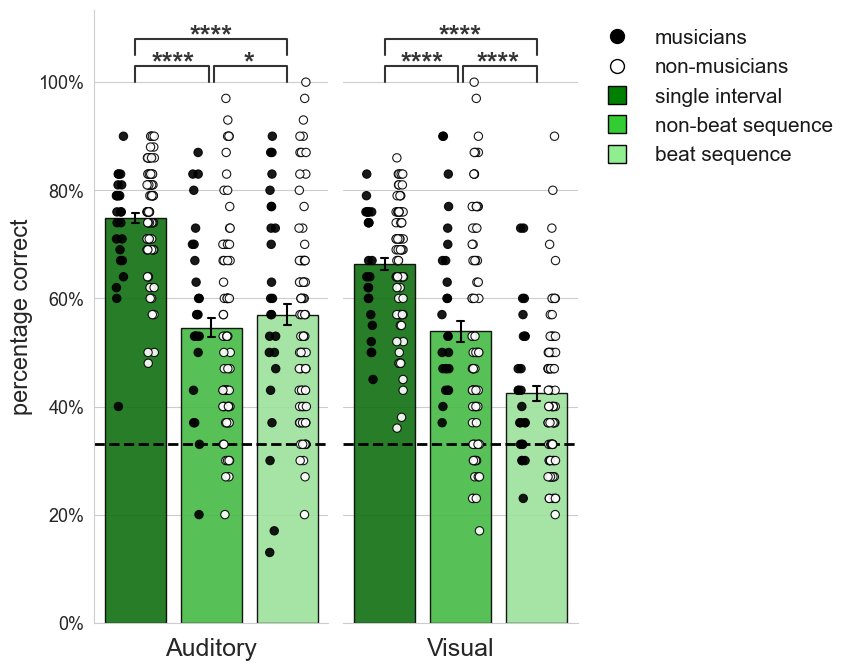

In [9]:
# 😍😍 this code is working!
sns.set_style('whitegrid')
plt.figure(figsize=(3,4))
############# plot #############
g=sns.catplot(data=onlined, kind='bar', x='Timing_level', y='value',col='Modality',errorbar='se', 
              palette=['green','limegreen','lightgreen'],edgecolor="black", # [(0.75, 0, 0, 0), (0, 0.25, 0, 0), (0, 1, 1, 0)]
               errcolor="black", errwidth=1.5, capsize = 0.1, height=7, aspect=0.4,alpha=0.9,
              legend=False, sharey=True, sharex=True, margin_titles=False)

g.map(sns.stripplot,'Timing_level','value',hue=onlined['Musicians'],hue_order=[2,1],palette=['black','white'], dodge=True,
       jitter = 0.1, alpha=0.9, edgecolor='k', linewidth=0.8, size=6)

############ Aestetics ###############
g.fig.tight_layout()
g.set_axis_labels("","percentage correct",size=17)
g.set_titles('')
g.axes[0,0].set_xlabel('Auditory',alpha=1,size=18)
g.axes[0,1].set_xlabel('Visual',alpha=1,size=18)
g.set_titles(row_template='{row_name}',col_template='{col_name}')

g.set_titles("")
sns.despine(ax=g.axes[0, 1], left=True)
g.set_xticklabels([]) # makes labels for each bar disappers
g.set_yticklabels(size=13)
g.axes[0,0].axhline(y=0.33, color='black', linestyle='--',lw=2)
g.axes[0,1].axhline(y=0.33, color='black', linestyle='--',lw=2)

############## legend ################
new_labels = ['musicians', 'non-musicians', 'single interval', 'non-beat sequence','beat sequence']
handles_swarm, labels_swarm = g.axes[0, 0].get_legend_handles_labels()

# Create a legend with custom icon colors
legend_colors = ['black', 'white', 'green','limegreen','lightgreen']  # Replace with your desired colors

custom_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markeredgecolor='black', markersize=10) if idx < 2
    else plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markeredgecolor='black', markersize=13)
    for idx, color in enumerate(legend_colors)
]

dot_legend = plt.legend(custom_handles, new_labels, loc='upper left', bbox_to_anchor=(1, 1),
                        frameon=False, fontsize=15, labelcolor='0.1', title='')

# Optionally, set the legend text (labels) color
dot_legend.get_title().set_color('0.2')  

from matplotlib.ticker import PercentFormatter
g.axes[0,0].yaxis.set_major_formatter(PercentFormatter(1.0))

########### Statistical significance #################
max_val=max(onlined['value'])
g.axes[0,0].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=0.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,0].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,0].text(x=1.5,y=max_val+0.02, s='*',ha='center',size=20,weight='bold',color='0.2')

g.axes[0,1].plot([0,0,0.97,0.97],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].plot([0,0,2,2],[max_val+0.05,max_val+0.08,max_val+0.08,max_val+0.05],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=0.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].text(x=1,y=max_val+0.07, s='****',ha='center',size=20,weight='bold',color='0.2')
g.axes[0,1].plot([1.03,1.03,2,2],[max_val,max_val+0.03,max_val+0.03,max_val],lw=1.5,color='0.2',clip_on=False)
g.axes[0,1].text(x=1.5,y=max_val+0.02, s='****',ha='center',size=20,weight='bold',color='0.2')

###### tif format
# tif_path = 'C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/group analysis.tif'
# plt.savefig(tif_path, bbox_inches='tight', dpi=600)  # Use 600 DPI for line drawings

### png format
plt.savefig('C:/Users/zhaleh/PhD_Projects/Hierarchy_to_Beat_Perception_Auditory_Visual/plots/group analysis.png', bbox_inches='tight',dpi=400)

plt.show()